In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
def plot_accuracy(base_path, files, ds, optim):
    
    plt.figure(figsize=(8, 4))

    label = ["ViT Baseline Train Acc", f"ViT {optim} Train Acc", "ViT Baseline Val Acc", f"ViT {optim} Val Acc"]
    color = ["r", "b", "r", "b"]
    linestyle = ["--", "--", "-", "-"]

    for i, filename in enumerate(files):
        with open(f"{base_path}/{filename}", 'r') as file:
            data = json.load(file)

            epoch = sorted([int(i) for i in list(data.keys())])
            acc = [data[str(i)] for i in epoch]

            plt.plot(epoch, acc, color=color[i], linestyle=linestyle[i], linewidth=1, label=label[i])

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'ViT Baseline vs {optim} ({ds}): Accuracy')
    plt.legend()
    plt.show()

def plot(base_path, files, stat, ds, optim):

    plt.figure(figsize=(8, 4))

    label = [f"ViT Baseline {stat}", f"ViT {optim} {stat}"]

    for i, filename in enumerate(files):
        with open(f"{base_path}/{filename}", 'r') as file:
            data = json.load(file)

            epoch = sorted([int(i) for i in list(data.keys())])
            acc = [data[str(i)] for i in epoch]

            plt.plot(epoch, acc, linewidth=1.5, label=label[i])

    plt.xlabel('Epochs')
    plt.ylabel(stat)
    plt.title(f'ViT Baseline vs {optim} ({ds}): {stat}')
    plt.legend()
    plt.show()

# DeCatt Loss

## CIFAR10

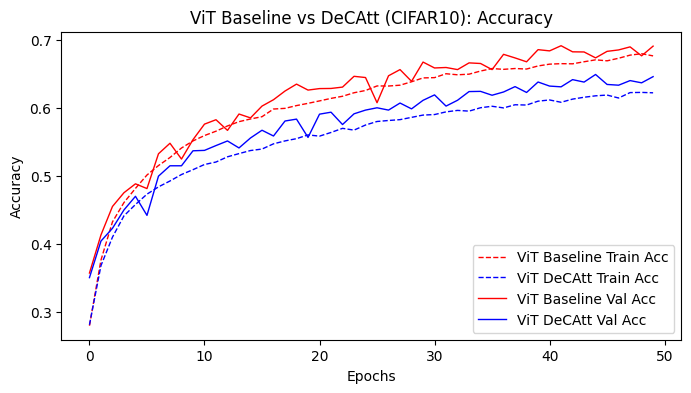

In [3]:
base_path = "stats"

files = ["vit_baseline_cifar10_trainacc.txt", "vit_decatt_cifar10_trainacc.txt",
        "vit_baseline_cifar10_valacc.txt", "vit_decatt_cifar10_valacc.txt"]

plot_accuracy("stats", files, "CIFAR10", "DeCAtt")

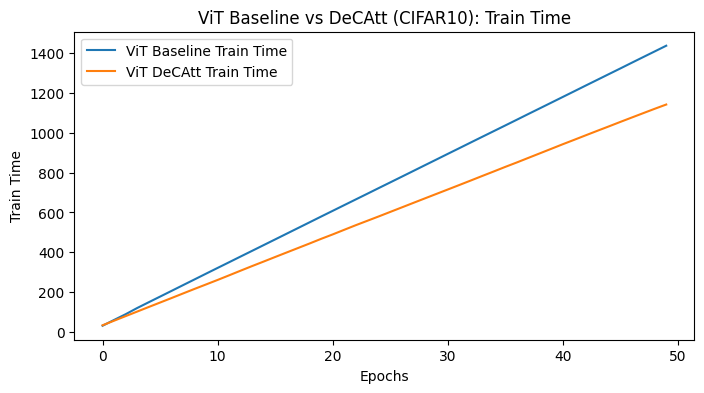

In [6]:
files = ["vit_baseline_cifar10_traintime.txt", "vit_decatt_cifar10_traintime.txt"]
plot("stats", files, "Train Time", "CIFAR10", "DeCAtt")

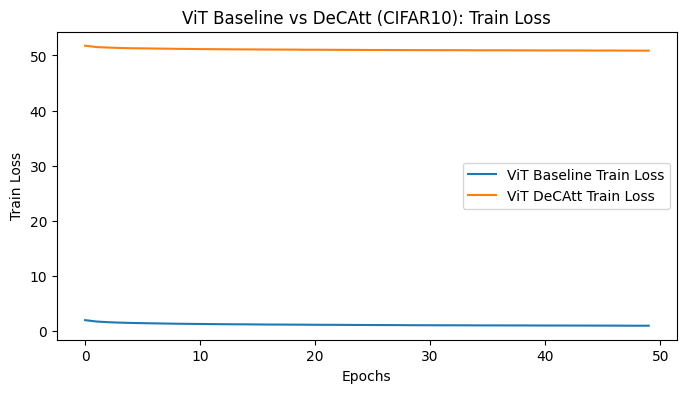

In [7]:
files = ["vit_baseline_cifar10_trainloss.txt", "vit_decatt_cifar10_trainloss.txt"]
plot("stats", files, "Train Loss", "CIFAR10", "DeCAtt")

## CIFAR100

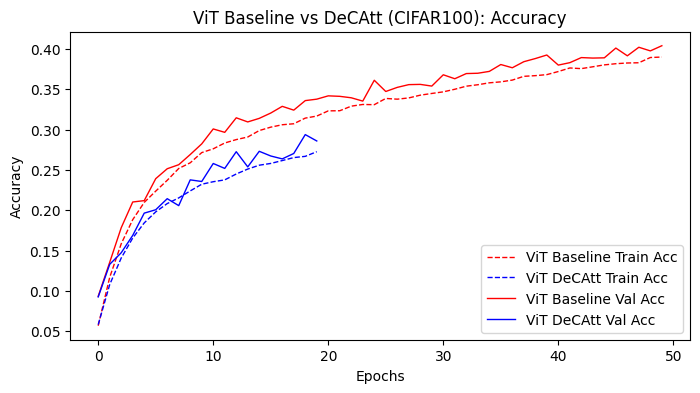

In [8]:
base_path = "stats"

files = ["vit_baseline_cifar100_trainacc.txt", "vit_decatt_cifar100_trainacc.txt",
        "vit_baseline_cifar100_valacc.txt", "vit_decatt_cifar100_valacc.txt"]

plot_accuracy("stats", files, "CIFAR100", "DeCAtt")

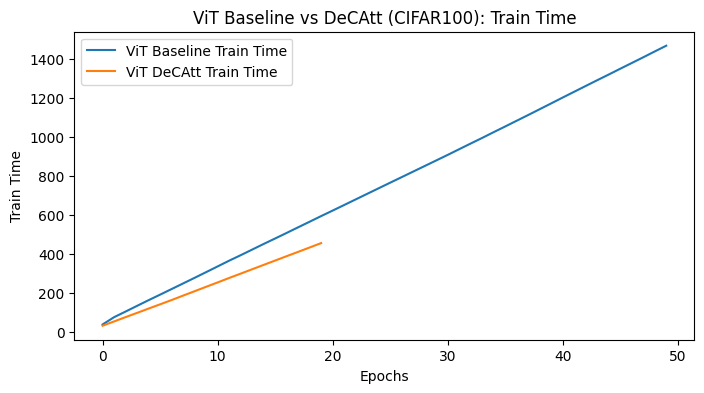

In [9]:
files = ["vit_baseline_cifar100_traintime.txt", "vit_decatt_cifar100_traintime.txt"]
plot("stats", files, "Train Time", "CIFAR100", "DeCAtt")

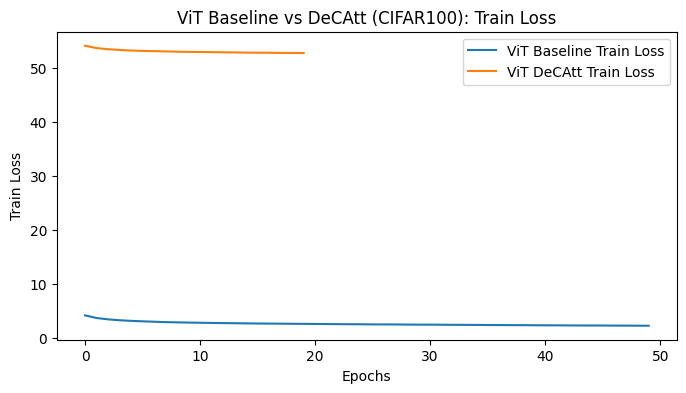

In [10]:
files = ["vit_baseline_cifar100_trainloss.txt", "vit_decatt_cifar100_trainloss.txt"]
plot("stats", files, "Train Loss", "CIFAR100", "DeCAtt")

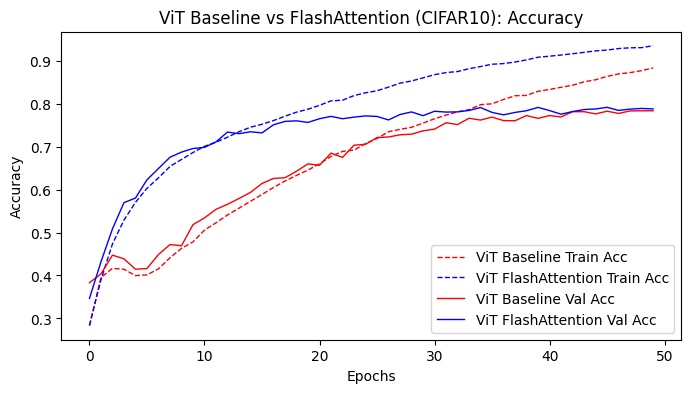

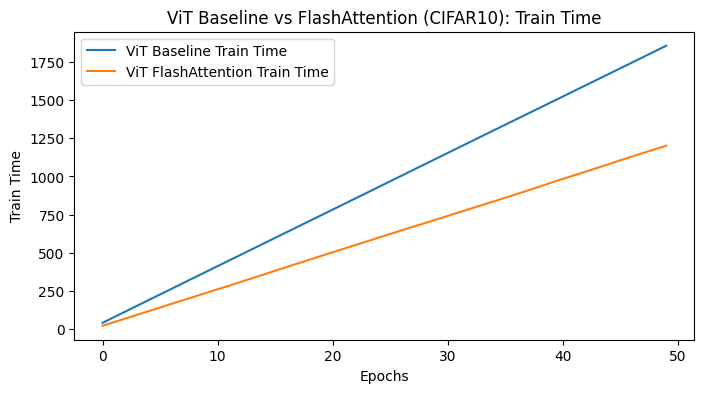

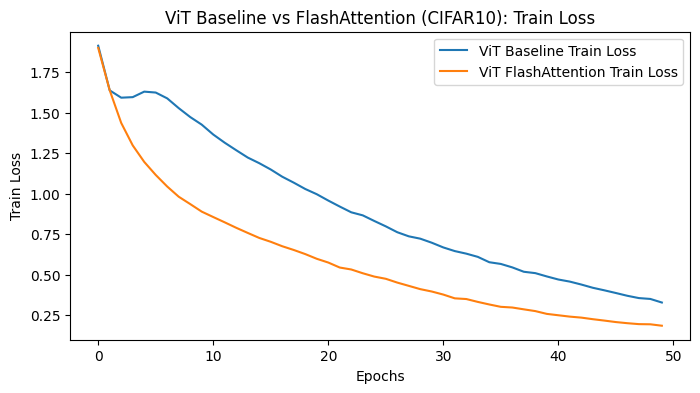

In [7]:
base_path = "stats"

files = ["vit_baseline_cifar10_trainacc.txt", "vit_flash_cifar10_trainacc.txt",
        "vit_baseline_cifar10_valacc.txt", "vit_flash_cifar10_valacc.txt"]

# plt.subplot(1,3,1)
plot_accuracy("stats", files, "CIFAR10", "FlashAttention")

# plt.subplot(1,3,2)
files = ["vit_baseline_cifar10_traintime.txt", "vit_flash_cifar100_traintime.txt"]
plot("stats", files, "Train Time", "CIFAR10", "FlashAttention")

# plt.subplot(1,3,3)
files = ["vit_baseline_cifar10_trainloss.txt", "vit_flash_cifar10_trainloss.txt"]
plot("stats", files, "Train Loss", "CIFAR10", "FlashAttention")

# Mixed Resolution Tokenization

## CIFAR10

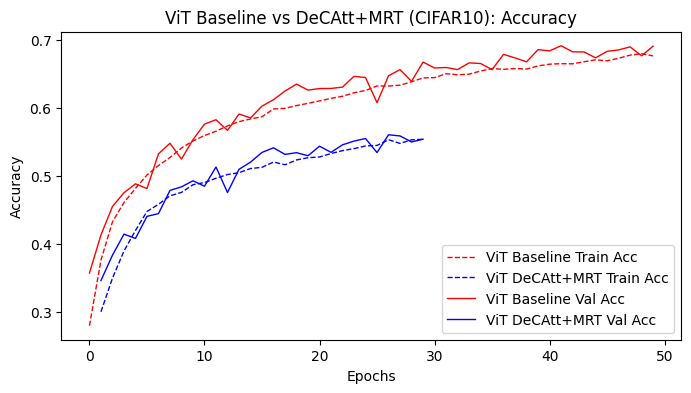

In [16]:
base_path = "stats"

files = ["vit_baseline_cifar10_trainacc.txt", "decatt_mrt_nheads3/vit_decatt_mrt_cifar10_trainacc.txt",
        "vit_baseline_cifar10_valacc.txt", "decatt_mrt_nheads3/vit_decatt_mrt_cifar10_valacc.txt"]

plot_accuracy(base_path, files, "CIFAR10", "DeCAtt+MRT")

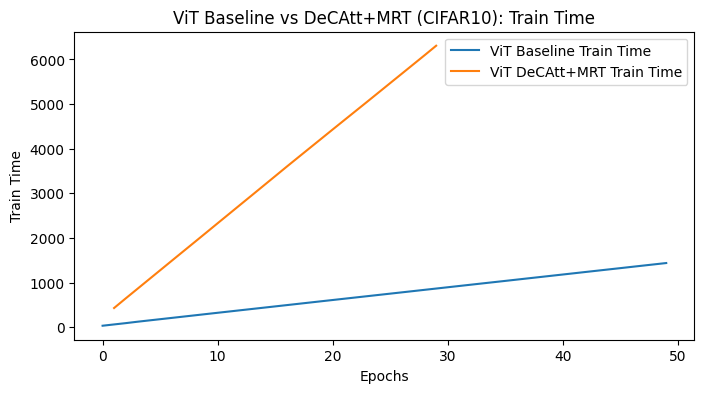

In [18]:
files = ["vit_baseline_cifar10_traintime.txt", "decatt_mrt_nheads3/vit_decatt_mrt_cifar10_traintime.txt"]
plot(base_path, files, "Train Time", "CIFAR10", "DeCAtt+MRT")